## Prediction using SVC/SVM


## Import all imporatant Libraries and load the iris dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn.datasets import load_iris
iris_data = load_iris()

### Check the keys of the dataset

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Know more with Description

In [4]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Find the Feature names (Independent variables)

In [5]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Find the target name (Dependent Variable)

In [6]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Print some of data

In [7]:
iris_data.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

### Check target value

In [8]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Create a dataframe with all features

In [9]:
iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Add target column to the dataframe

In [10]:
iris['target'] = iris_data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 

## ScatterPlot of all independent variable to dependent variable

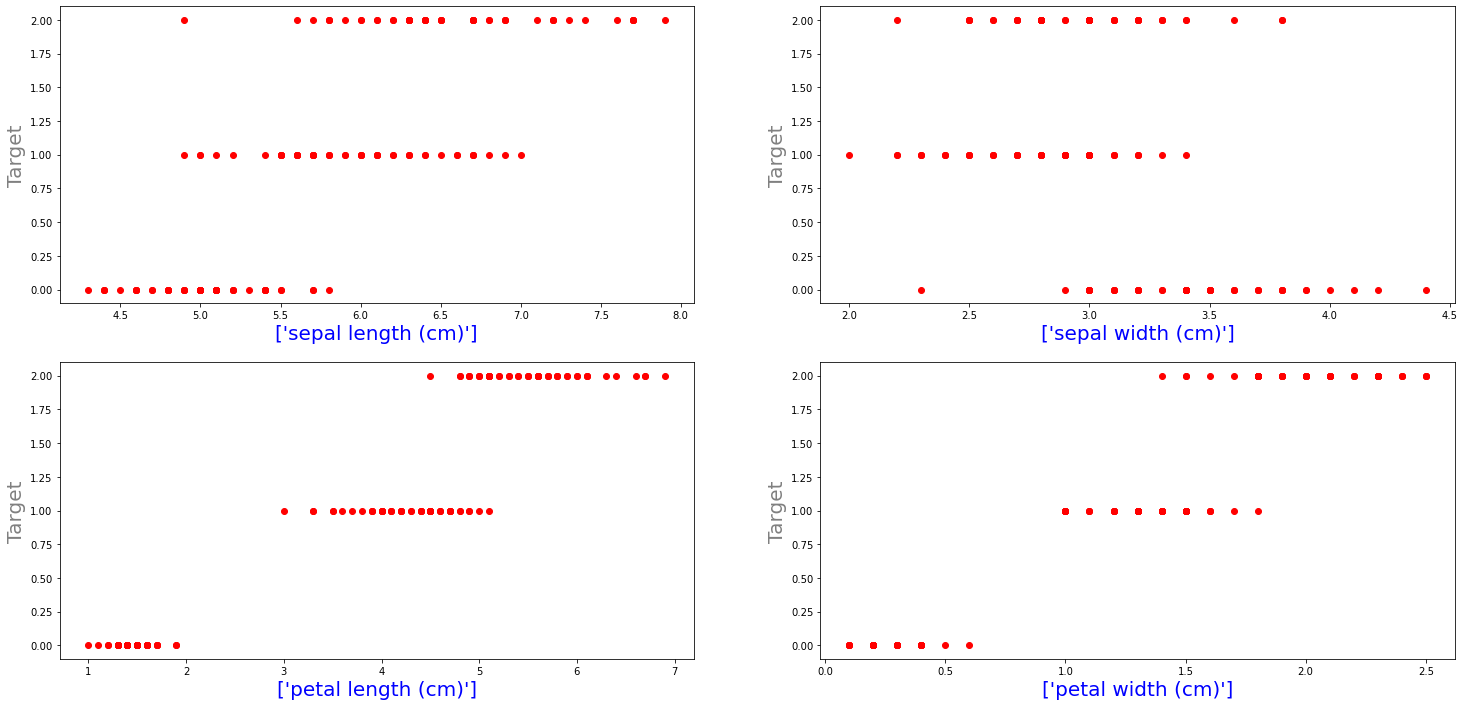

In [11]:
fig = plt.figure(figsize=(25,12))

col = iris_data.feature_names
y = iris_data.target


for i in range(len(col)):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(iris[col[i]],y,color='r')
    ax.set_xlabel([col[i]],size="20",color='b')
    ax.set_ylabel("Target",size="20",color='grey')

### 

## Correlation between all columns

<AxesSubplot:>

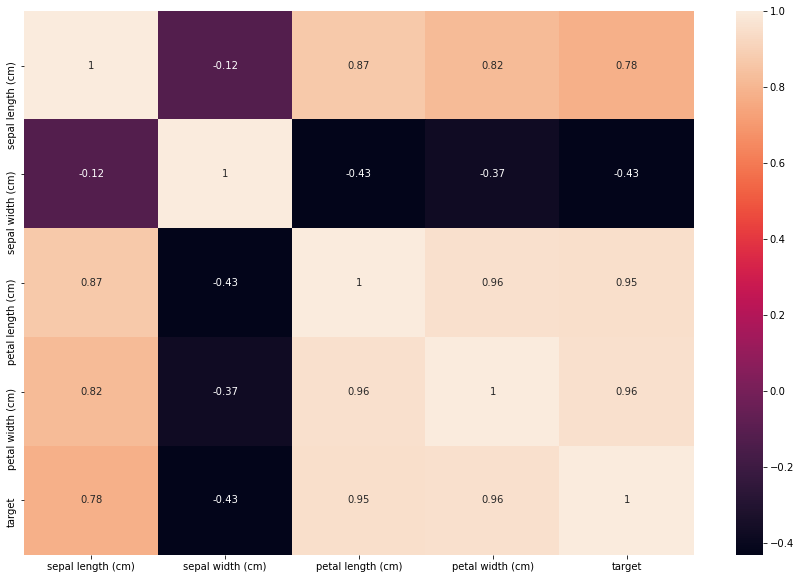

In [12]:
correlation = iris.corr().round(2)
#print(correlation)

plt.figure(figsize=(15,10))
#correlation_matrix
sns.heatmap(data=correlation, annot=True)

#### We can see, target column is highly correlated with 'Petal length' & 'Petal Width'.
#### But, we will use Sepal length and width columns as our training and testing data

### 

## Scatter plots of length-width columns

Text(0, 0.5, "['sepal width (cm)']")

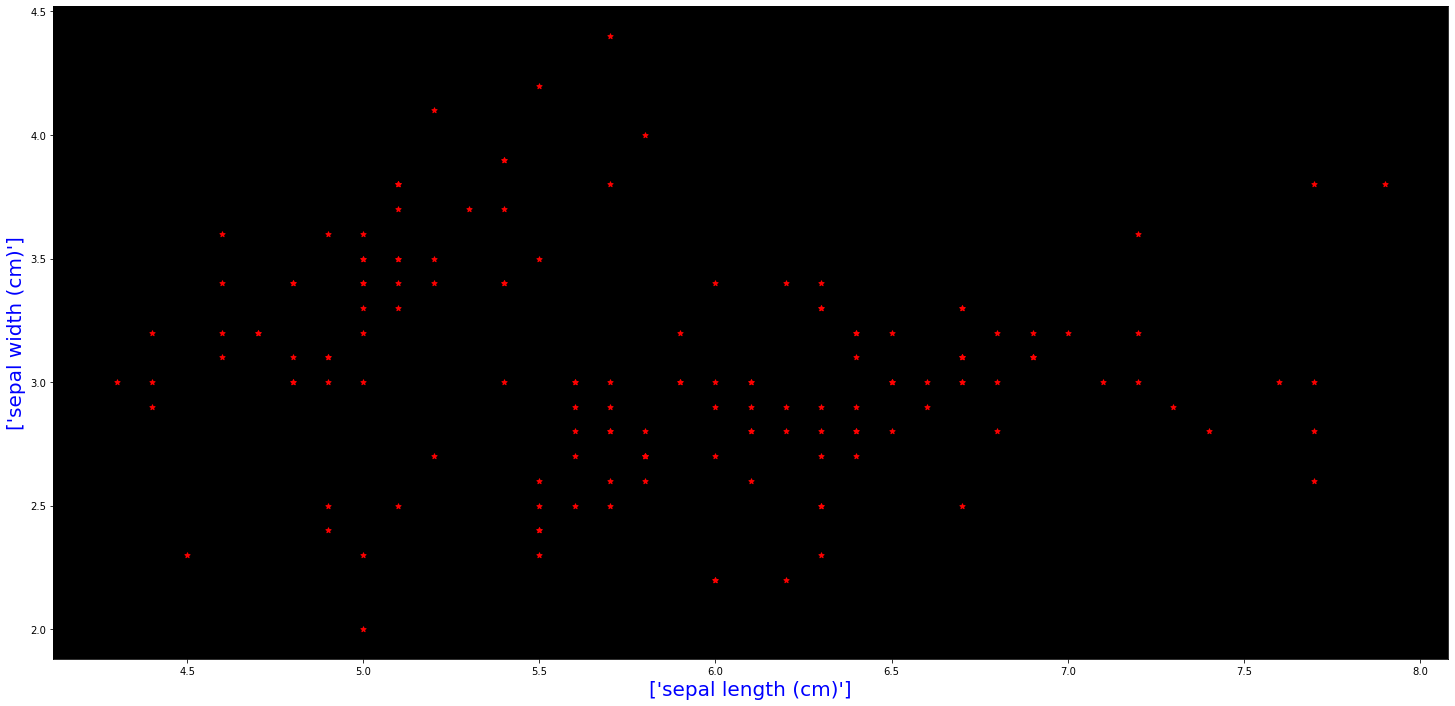

In [13]:
fig = plt.figure(figsize=(25,12))

col = iris_data.feature_names[:2]

ax = fig.add_subplot(facecolor='black')
ax.scatter(iris[col[0]],iris[col[1]], marker='*',color='r',s=30)
ax.set_xlabel([col[0]],size="20",color='b')
ax.set_ylabel([col[1]],size="20",color='b')


Text(0, 0.5, "['petal width (cm)']")

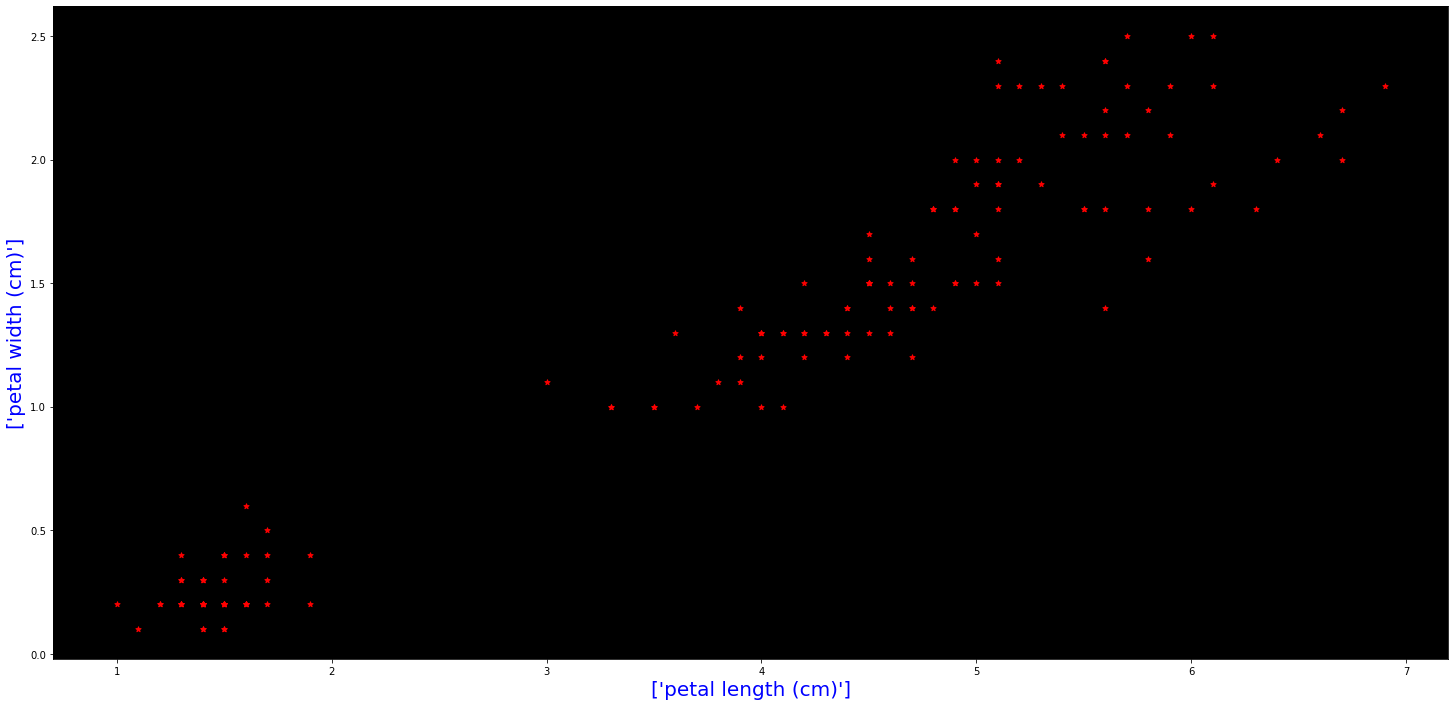

In [14]:
fig = plt.figure(figsize=(25,12))

col = iris_data.feature_names[2:]

ax = fig.add_subplot(facecolor='black')
ax.scatter(iris[col[0]],iris[col[1]], marker='*',color='r',s=30)
ax.set_xlabel([col[0]],size="20",color='b')
ax.set_ylabel([col[1]],size="20",color='b')

### 

## Lmplot with target specification for both type of length-width

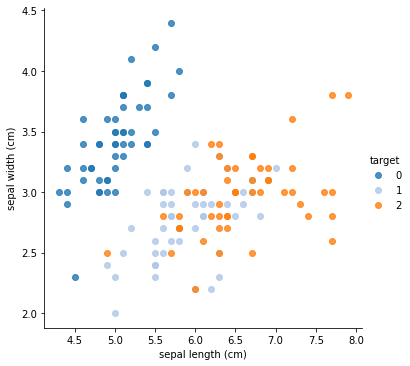

In [15]:
sns.lmplot('sepal length (cm)', 'sepal width (cm)', data=iris,  
             palette=sns.color_palette('tab20', n_colors=3),  hue = 'target', fit_reg=False)

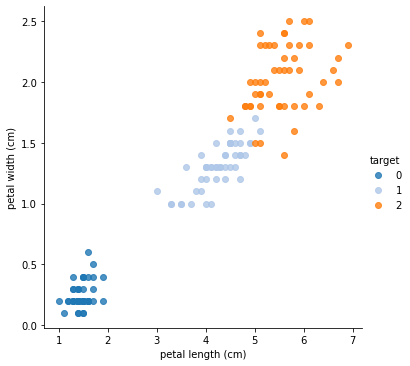

In [16]:
sns.lmplot('petal length (cm)', 'petal width (cm)', data=iris,  
             palette=sns.color_palette('tab20', n_colors=3),  hue = 'target', fit_reg=False)

### 

## Split our dataset into train and test sets

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data[:,:2], iris_data.target, test_size=.20)

### Check shape of new datasets

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


### 

## Model Predication with different kernels

### Linear kernel

In [19]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, Y_train)
Y_predict_linear = svc_linear.predict(X_test)

### Polynomial Kernel

In [20]:
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(X_train, Y_train)
Y_predict_poly = svc_poly.predict(X_test)

### Gaussian rbf kernel

In [21]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, Y_train)
Y_predict_rbf = svc_rbf.predict(X_test)

### Sigmoid Kernel

In [22]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, Y_train)
Y_predict_sigmoid = svc_sigmoid.predict(X_test)

#### 

## Compare actual data with the predicted by all kernels

In [23]:
dt = {'Values':['Value1','Value2','Value3','Value4','Value5'],
      'Actual':Y_test[:5],
     'Linear':Y_predict_linear[:5],
     'Polynomial':Y_predict_poly[:5],
     'Gaussian RBF':Y_predict_rbf[:5],
     'Sigmoid':Y_predict_sigmoid[:5] }
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,Linear,Polynomial,Gaussian RBF,Sigmoid
0,Value1,2,2,2,2,0
1,Value2,1,1,1,1,0
2,Value3,1,1,1,1,0
3,Value4,1,1,1,1,0
4,Value5,2,1,1,1,0


### 

## Evaluation matrix with accuracy score

In [24]:
matrix_evaluation = pd.DataFrame({'Kernal' :['Linear','Polynomial','Gaussian RBF','Sigmoid'],
                                'MAE': [mean_absolute_error(Y_test,Y_predict_linear),
                                        mean_absolute_error(Y_test,Y_predict_poly),
                                        mean_absolute_error(Y_test,Y_predict_rbf),
                                        mean_absolute_error(Y_test,Y_predict_sigmoid),
                                       ], 
                                'MSE': [mean_squared_error(Y_test,Y_predict_linear),
                                        mean_squared_error(Y_test,Y_predict_poly),
                                        mean_squared_error(Y_test,Y_predict_rbf),
                                        mean_squared_error(Y_test,Y_predict_sigmoid)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predict_linear)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_poly)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_rbf)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_sigmoid))],
                                    'R2_score': [r2_score(Y_test,Y_predict_linear),          
                                                 r2_score(Y_test,Y_predict_poly),
                                                 r2_score(Y_test,Y_predict_rbf),          
                                                 r2_score(Y_test,Y_predict_sigmoid)],
                                 'Accuracy Score': [accuracy_score(Y_test,Y_predict_linear),
                                                   accuracy_score(Y_test,Y_predict_poly),
                                                   accuracy_score(Y_test,Y_predict_rbf),
                                                   accuracy_score(Y_test,Y_predict_sigmoid)] })


matrix_evaluation

,Kernal,MAE,MSE,RMSE,R2_score,Accuracy Score
0,Linear,0.200000,0.200000,0.447214,0.683656,0.800000
1,Polynomial,0.166667,0.166667,0.408248,0.736380,0.833333
2,Gaussian RBF,0.200000,0.200000,0.447214,0.683656,0.800000
3,Sigmoid,1.033333,1.700000,1.303840,-1.688928,0.300000


In [25]:
labels = iris_data.target_names.tolist()

### 

## Confusion Matrix - comparison among all kernels

In [26]:
cml = confusion_matrix(Y_test, Y_predict_linear)
cmp = confusion_matrix(Y_test, Y_predict_poly)
cmg = confusion_matrix(Y_test, Y_predict_rbf)
cms = confusion_matrix(Y_test, Y_predict_sigmoid)


print("\nConfusion matrix of Linear Kernel:\n",cml)
print("\n\nConfusion matrix of Polynomial Kernel:\n",cmp)
print("\n\nConfusion matrix of Gaussian rbf Kernel:\n",cmg)
print("\n\nConfusion matrix of Sigmoid Kernel:\n",cms)


Confusion matrix of Linear Kernel:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  5  5]]


Confusion matrix of Polynomial Kernel:
 [[9 0 0]
 [0 9 2]
 [0 3 7]]


Confusion matrix of Gaussian rbf Kernel:
 [[ 9  0  0]
 [ 0 10  1]
 [ 0  5  5]]


Confusion matrix of Sigmoid Kernel:
 [[ 9  0  0]
 [11  0  0]
 [10  0  0]]


### 

## Graphical Representation of confusion matrix of all kernels

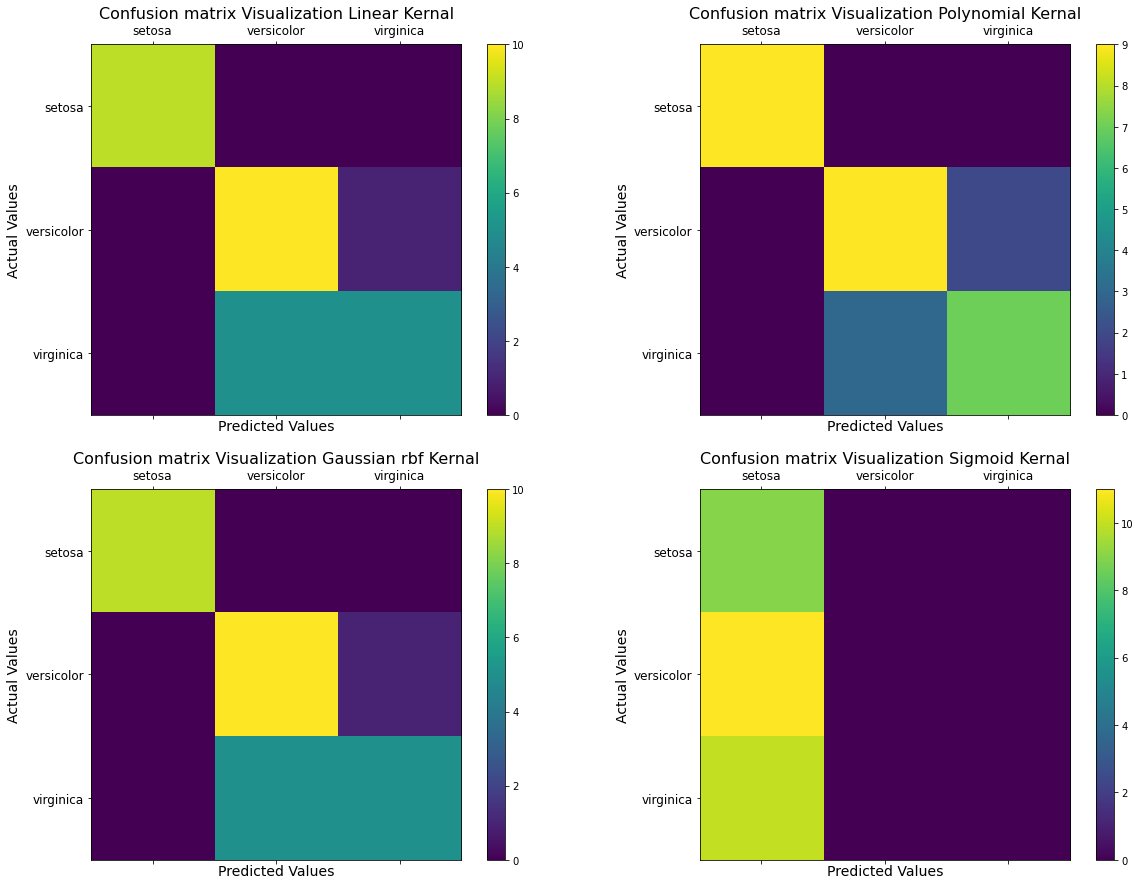

In [27]:
cm = [cml,cmp,cmg,cms]
kname = ['Linear','Polynomial','Gaussian rbf','Sigmoid']


fig = plt.figure(figsize=(20,15))

for i in range(0,4):
    axes = fig.add_subplot(2,2,i+1)
    mv = axes.matshow(cm[i])
    axes.set_title('Confusion matrix Visualization '+kname[i]+' Kernal',size='16')
    fig.colorbar(mv)
    axes.set_xticklabels([''] + labels,size='12')
    axes.set_yticklabels([''] + labels,size='12')
    axes.set_xlabel('Predicted Values',size='14')
    axes.set_ylabel('Actual Values',size='14')

### 

## Classification Report - Comparison of all kernels

In [28]:
crl = classification_report(Y_test,Y_predict_linear,target_names=labels)
crp = classification_report(Y_test,Y_predict_poly,target_names=labels)
crg = classification_report(Y_test,Y_predict_rbf,target_names=labels)
crs = classification_report(Y_test,Y_predict_sigmoid,target_names=labels)

print("\n\nClassification Report of Linear Kernel: \n\n",crl)
print("\n\nClassification Report of Polynomial Kernel: \n\n",crp)
print("\n\nClassification Report of Gaussian rbf Kernel: \n\n",crg)
print("\n\nClassification Report of Sigmoid Kernel: \n\n",crs)



Classification Report of Linear Kernel: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.67      0.91      0.77        11
   virginica       0.83      0.50      0.62        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.80        30
weighted avg       0.82      0.80      0.79        30



Classification Report of Polynomial Kernel: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.75      0.82      0.78        11
   virginica       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.83      0.83      0.83        30



Classification Report of Gaussian rbf Kernel: 

               precision    recall  f1-score   support

      setosa       1.00      1.00     

### Gaussian Kernel gives more Precision, Recall, F1-score and Accuracy

### 

## Support vectors of all kernels

In [29]:
support_vectors_l = svc_linear.support_vectors_
support_vectors_p = svc_poly.support_vectors_
support_vectors_g = svc_rbf.support_vectors_
support_vectors_s = svc_sigmoid.support_vectors_


print("\n Support Vectors of Linear Kernel:\n",support_vectors_l[:5])
print("\n Support Vectors of Polynomial Kernel:\n",support_vectors_p[:5])
print("\n Support Vectors of Gaussian rbf Kernel:\n",support_vectors_g[:5])
print("\n Support Vectors of Sigmoid Kernel:\n",support_vectors_s[:5])


 Support Vectors of Linear Kernel:
 [[4.8 3. ]
 [5.4 3.4]
 [5.1 3.3]
 [4.8 3. ]
 [5.8 4. ]]

 Support Vectors of Polynomial Kernel:
 [[4.5 2.3]
 [5.  3. ]
 [6.5 2.8]
 [5.7 3. ]
 [6.1 2.8]]

 Support Vectors of Gaussian rbf Kernel:
 [[4.9 3.1]
 [4.8 3. ]
 [4.9 3.1]
 [5.4 3.7]
 [5.4 3.4]]

 Support Vectors of Sigmoid Kernel:
 [[4.6 3.2]
 [5.  3.4]
 [4.9 3.1]
 [5.2 4.1]
 [4.9 3.6]]


### 

## Plot support vectors, training data points and Hyperplane

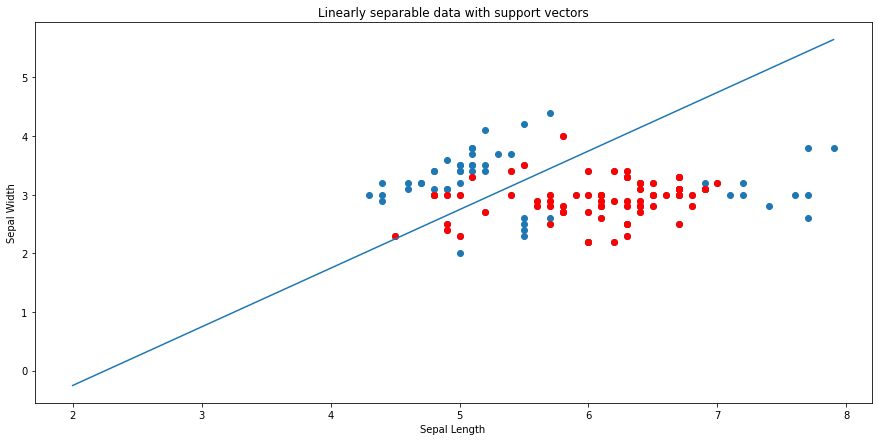

In [30]:
# Get the separating Hyperplane

x_max = X_train.max()
x_min = X_train.min()

w = svc_linear.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (svc_linear.intercept_[0]) / w[1]

# xx & yy are hyperplan parameters

#print(w)
#print(a)
#print(xx)
#print(yy)

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = support_vectors_l[0]
yy_down = a * xx + (b[1] - a * b[0])
b = support_vectors_l[-1]
yy_up = a * xx + (b[1] - a * b[0])


# Scatter Plot of the support vector and train dataset with hyperplan

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

# Scatter plot of Training set column 1 and 2
ax.scatter(X_train[:, 0], X_train[:, 1])

# Scatter plot of support vectors
ax.scatter(support_vectors_l[:,0], support_vectors_l[:,1], color='red')

ax.set_title('Linearly separable data with support vectors')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# Hyperplane
ax.plot(xx,yy)



### 

## Plot margin of upper and lower boundry with hyperplan

Text(0.5, 1.0, 'Hyperplane with margin for linearl Kernel')

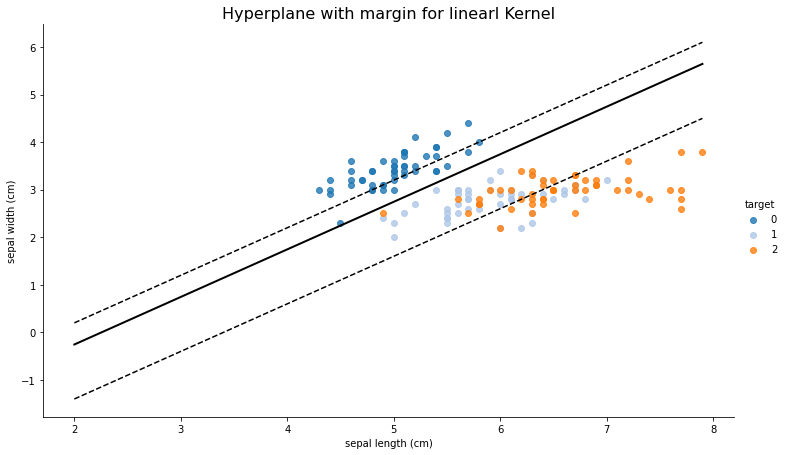

In [31]:
# Support vector, training dataset, Hyperplane with upper and lower boundry

sns.lmplot('sepal length (cm)', 'sepal width (cm)', data=iris,  
             palette=sns.color_palette('tab20', n_colors=3),  hue = 'target', fit_reg=False, size=6, aspect=1.7 )


plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(support_vectors_l[:,0], support_vectors_l[:,1],s=80, facecolors='none');
plt.title("Hyperplane with margin for linearl Kernel",size='16')

## 

## For all non-linear kernels: Hyperplane with data points

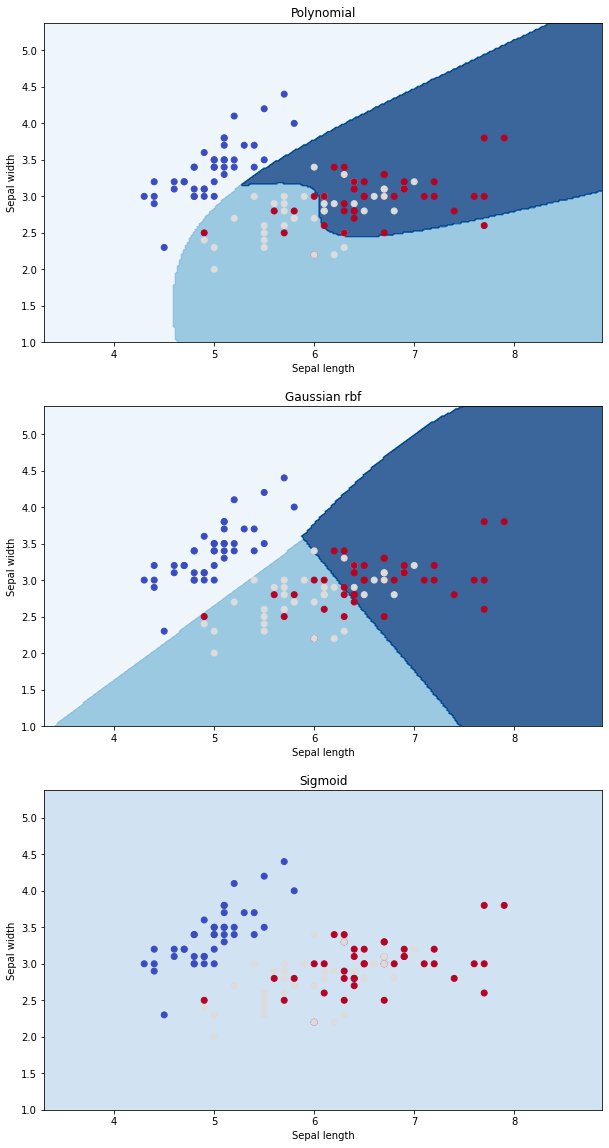

In [32]:
# Get the separating Hyperplane

#x_max = X_train.max()
#x_min = X_train.min()

h = .02


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(10,20))

for i, ker in enumerate((svc_poly, svc_rbf, svc_sigmoid)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    ax = fig.add_subplot(3,1,i+1)


    Z = ker.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(kname[i+1])

##  

## Prediction Time..!

In [33]:
# Create a function to guess the flower type
def check_linear(l, w):
    if svc_linear.predict([[l, w]]) == 0:
        print('Linear kernel Prediction: Setosa !')
    elif svc_linear.predict([[l, w]]) == 1:
        print('Linear kernel Prediction: Versicolor !')
    else:
        print('Linear kernel Prediction: Virginica !')
        
def check_poly(l, w):
    if svc_linear.predict([[l, w]]) == 0:
        print('Polynomial kernel Prediction: Setosa !')
    elif svc_linear.predict([[l, w]]) == 1:
        print('Polynomial kernel Prediction: Versicolor !')
    else:
        print('Polynomial kernel Prediction: Virginica !')
        
def check_gaussian(l, w):
    if svc_linear.predict([[l, w]]) == 0:
        print('Gaussian rbf kernel Prediction: Setosa !')
    elif svc_linear.predict([[l, w]]) == 1:
        print('Gaussian rbf kernel Prediction: Versicolor !')
    else:
        print('Gaussian rbf kernel Prediction: Virginica !')
        
def check_sigmoid(l, w):
    if svc_linear.predict([[l, w]]) == 0:
        print('Sigmoid kernel Prediction: Setosa !')
    elif svc_linear.predict([[l, w]]) == 1:
        print('Sigmoid kernel Prediction: Versicolor !')
    else:
        print('Sigmoid kernel Prediction: Virginica !')

### Chose a random row from the dataset

In [34]:
import random 
random.seed(7889)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(iris))

# Selects a random column with random number we found above
trail = iris.drop('target', axis=1).iloc[random_num]
trail = trail[:2]
trail

sepal length (cm)    5.2
sepal width (cm)     4.1
Name: 32, dtype: float64

In [35]:
print(X_test.shape)
print(trail.shape)

(30, 2)
(2,)


In [36]:
trail = trail.values.reshape(1,-1)
trail.shape

(1, 2)

### Predict with all kernel models

In [47]:
trail[:,0][0]

5.2

In [50]:
check_linear(trail[:,0][0],trail[:,1][0]),
check_poly(trail[:,0][0],trail[:,1][0]),
check_gaussian(trail[:,0][0],trail[:,1][0]),
check_sigmoid(trail[:,0][0],trail[:,1][0])

Linear kernel Prediction: Setosa !
Polynomial kernel Prediction: Setosa !
Gaussian rbf kernel Prediction: Setosa !
Sigmoid kernel Prediction: Setosa !


In [51]:
pred = pd.DataFrame({'Type': ['Actual value', 'Linear', 'Polynomial','Gaussian rbf','Sigmoid'],
                         'Value': [iris.iloc[random_num]['target'], 
                                   svc_linear.predict(trail)[0],
                                   svc_poly.predict(trail)[0],
                                   svc_rbf.predict(trail)[0],
                                   svc_sigmoid.predict(trail)[0]
                                  ]})

pred

,Type,Value
0,Actual value,0.0
1,Linear,0.0
2,Polynomial,0.0
3,Gaussian rbf,0.0
4,Sigmoid,0.0


## 

## As we can see from the comparison of the Matrix Evaluation, Confusion matrix, Classification Report, Gaussian rbf Kernel gives more accurate results compare to all other kernels.

### So, it's safe to use Gaussian rbf kernel

### Sigmoid kernel gives worst result